## Semantic Analysis of reviews of a restaurant
This notebook is going to implement a classifier model to classify the reviews of a restaurant into two categories i.e. positive and negative.

In [1]:
%matplotlib notebook
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Dataset
Dataset is a tsv file.
The dataset contains:
1. Statements or reviews given by the customer in english language as independent variable
2. The dependent variable is a label i.e. 0 for negative review and 1 for positive review 

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Cleaning the text
Before we create our model to classify the text, we first need to made the text suitable for classificatoin.

For that we need to convert each sentence to a list of words and then remove the irrevelant words that are not significant in the classification, these words are called stopwords.

After removing the stopwords we need to convert each word to its root word e.g. convert all past participles into present verbs, removing ing, s/es, etc.

For this we are going to use nltk library.

In [3]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shubham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from  nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stopwords = stopwords.words('english')
morewords = ['The', 'the', 'I', 'i', 'we', 'We', 'He', 'he', 'she', 'She', 'They', 'they']
stopwords = stopwords + morewords
stopwords = set(stopwords)

In [5]:
corpus = []
for i in range(0, len(dataset)):
    review = re.sub(r'[^a-zA-z]', ' ', dataset['Review'][i])
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

After processing the dataset the dataset will look like this

In [6]:
corpus[0:5]

['wow love place',
 'crust good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [7]:
words_freq = {}
for sentence in corpus:
    for word in sentence.split():
        words_freq[word] = words_freq.get(word, 0) + 1;

<IPython.core.display.Javascript object>


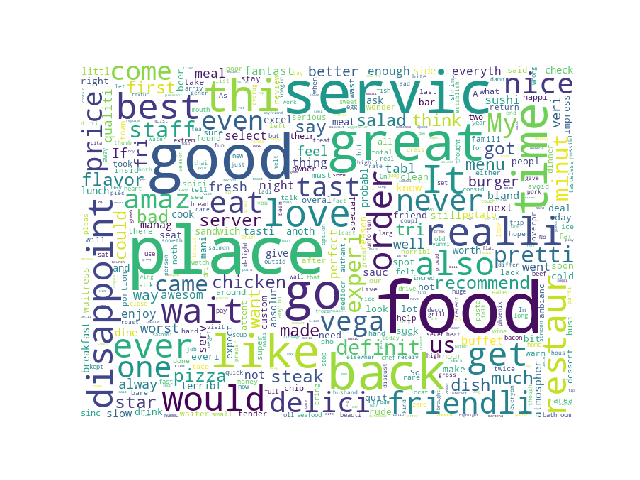

In [8]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
                      height=500,
                      width=700,
                      max_words=500,
                      max_font_size=100,
                      random_state=40,
                      ).fit_words(words_freq)

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Creating the Bag of Words model

In [9]:
print('Total words in the model: ', len(words_freq))

Total words in the model:  1636


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [11]:
# Splinting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Classification using Naive Bayes Classifiers

In [22]:
# Fitting Naive Bayes model to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62, 46],
       [18, 74]], dtype=int64)

### Accuracy of Naive Bayes 

In [24]:
(62+74)/(200)

0.68

## Classification using Aritifical Neural Network

In [12]:
# Fitting an Aritificial Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\Shubham\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
model = Sequential()
model.add(Dense(751, input_dim=1500, kernel_initializer='uniform', activation='relu'))
model.add(Dense(376, kernel_initializer='uniform', activation='relu'))
model.add(Dense(188, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(X_train, y_train, batch_size=200, epochs=10)

Epoch 1/10
800/800 [==============================] - 1s 1ms/step - loss: 0.6924 - acc: 0.5900
Epoch 2/10
800/800 [==============================] - 0s 334us/step - loss: 0.6786 - acc: 0.8863
Epoch 3/10
800/800 [==============================] - 0s 317us/step - loss: 0.6212 - acc: 0.9213
Epoch 4/10
800/800 [==============================] - 0s 308us/step - loss: 0.4679 - acc: 0.9412
Epoch 5/10
800/800 [==============================] - 0s 330us/step - loss: 0.2542 - acc: 0.9488
Epoch 6/10
800/800 [==============================] - 0s 312us/step - loss: 0.1045 - acc: 0.9800
Epoch 7/10
800/800 [==============================] - 0s 322us/step - loss: 0.0460 - acc: 0.9888
Epoch 8/10
800/800 [==============================] - 0s 315us/step - loss: 0.0204 - acc: 0.9900
Epoch 9/10
800/800 [==============================] - 0s 320us/step - loss: 0.0137 - acc: 0.9925
Epoch 10/10
800/800 [==============================] - 0s 308us/step - loss: 0.0092 - acc: 0.9950


In [36]:
scores = model.evaluate(X_test, y_test, verbose = 0)

### Accruacy of ANN

In [37]:
scores[1]

0.75